In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression


In [ ]:
data = pd.read_csv("processed_car_data.csv")

In [3]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,3,1,0,2,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,1,1,0,2,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,2,1,0,4,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,1,0,4,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1


random_null :  a function which helps to randomly change values to null according to the percentage we mention 

In [4]:
def random_null(df, column_list, percentage):
    df_copy  = df
    percentage = percentage / 100
    total_rows = df_copy.shape[0]
    
    for column_name in column_list:
        
        num_nulls = int(total_rows * percentage)
        null_indices = np.random.choice(df_copy.index, num_nulls, replace= False)
        df_copy.loc[null_indices, column_name] = np.nan
        
    return df_copy

In [5]:
data_columns = list(data.columns)

In [7]:
data_columns

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'company_name']

In [8]:
data_with_null_values = random_null(data, data_columns, 10)

In [9]:
data_with_null_values.isnull().sum()

symboling           20
fueltype            20
aspiration          20
doornumber          20
carbody             20
drivewheel          20
enginelocation      20
wheelbase           20
carlength           20
carwidth            20
carheight           20
curbweight          20
enginetype          20
cylindernumber      20
enginesize          20
fuelsystem          20
boreratio           20
stroke              20
compressionratio    20
horsepower          20
peakrpm             20
citympg             20
highwaympg          20
price               20
company_name        20
dtype: int64

In [10]:
data_null_places = data_with_null_values.isnull()

In [11]:
data_null_places

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
3,True,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
201,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
203,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [12]:
def iterative_Cleaning_discrete_values(data, null_place_df,columns_list, number_of_loops):
    for i in range(1,number_of_loops+1):
        for column_name in columns_list:
            data_without_null_values = data[null_place_df[column_name]== False]
            data_with_null_values = data[null_place_df[column_name] == True]
        
            x_train = data_without_null_values.drop(columns = [column_name])
            y_train = data_without_null_values[column_name]
        
            model = RandomForestClassifier()
            model.fit(x_train, y_train)
        
            x_test = data_with_null_values.drop(columns= [column_name])
        
            predicted = model.predict(x_test)
        
            data.loc[data_with_null_values.index , column_name] = predicted
    
    return data    
        
        
        
    

In [13]:
data_first = iterative_Cleaning(data_with_null_values, data_null_places,column_list )

NameError: name 'iterative_Cleaning' is not defined

In [ ]:
iterative_data = data_first[data_null_places["symboling"] == True][["symboling"]]

In [ ]:
original_data = data[data_null_places["symboling"] == True][["symboling"]]

In [ ]:
sum

,symboling
1,0.0
9,0.0
14,0.0
16,0.0
30,0.0
51,0.0
64,0.0
65,0.0
71,0.0
78,0.0


In [ ]:
column = data_columns[0]

In [ ]:
column_list = ["wheelbase"]

In [ ]:
column_list

['wheelbase']

In [ ]:
sample_test = data_with_null_values[data_null_places["symboling"] == True]

In [ ]:
sample_test

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
1,NaN,NaN,0.0,2.0,0.0,2.0,0.0,88.6,168.8,64.1,...,5.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.000,0.0
9,NaN,1.0,1.0,2.0,2.0,0.0,0.0,99.5,178.2,67.9,...,NaN,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,17859.167,1.0
14,NaN,NaN,0.0,4.0,3.0,NaN,0.0,103.5,189.0,66.9,...,5.0,NaN,3.19,9.0,121.0,4250.0,NaN,25.0,24565.000,NaN
16,NaN,1.0,0.0,2.0,3.0,2.0,0.0,103.5,193.8,67.9,...,5.0,3.62,NaN,NaN,182.0,5400.0,16.0,22.0,41315.000,2.0
30,NaN,1.0,0.0,2.0,2.0,1.0,NaN,86.6,144.6,63.9,...,0.0,2.91,3.41,9.6,58.0,4800.0,49.0,54.0,NaN,NaN
51,NaN,1.0,0.0,NaN,2.0,1.0,NaN,93.1,159.1,64.2,...,1.0,3.03,3.15,9.0,NaN,5000.0,31.0,38.0,6095.000,9.0
64,NaN,1.0,0.0,4.0,2.0,1.0,0.0,98.8,177.8,66.5,...,1.0,3.39,3.39,8.6,84.0,NaN,26.0,32.0,11245.000,9.0
65,NaN,1.0,0.0,4.0,3.0,2.0,0.0,104.9,NaN,66.1,...,5.0,3.76,3.16,8.0,120.0,5000.0,19.0,27.0,18280.000,9.0
71,NaN,1.0,0.0,4.0,3.0,NaN,0.0,115.6,202.6,71.7,...,5.0,3.46,3.10,8.3,155.0,4750.0,16.0,18.0,34184.000,3.0
78,NaN,1.0,0.0,2.0,2.0,1.0,0.0,93.7,157.3,64.4,...,1.0,2.97,3.23,9.4,68.0,5500.0,31.0,38.0,6669.000,11.0


In [ ]:
# Select only float columns
float_columns = data.select_dtypes(include=['float64', 'float32'])

# Calculate the correlation matrix
corr_matrix = float_columns.corr()

print(corr_matrix)



                  wheelbase  carlength  carwidth  carheight  boreratio  \
wheelbase          1.000000   0.874587  0.795144   0.589435   0.488750   
carlength          0.874587   1.000000  0.841118   0.491029   0.606454   
carwidth           0.795144   0.841118  1.000000   0.279210   0.559150   
carheight          0.589435   0.491029  0.279210   1.000000   0.171071   
boreratio          0.488750   0.606454  0.559150   0.171071   1.000000   
stroke             0.160959   0.129533  0.182942  -0.055307  -0.055909   
compressionratio   0.249786   0.158414  0.181129   0.261214   0.005197   
price              0.577816   0.682920  0.759325   0.119336   0.553173   

                    stroke  compressionratio     price  
wheelbase         0.160959          0.249786  0.577816  
carlength         0.129533          0.158414  0.682920  
carwidth          0.182942          0.181129  0.759325  
carheight        -0.055307          0.261214  0.119336  
boreratio        -0.055909          0.005197  0.

In [ ]:
corr_matrix

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.488750,0.160959,0.249786,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.606454,0.129533,0.158414,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.559150,0.182942,0.181129,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.171071,-0.055307,0.261214,0.119336
boreratio,0.488750,0.606454,0.559150,0.171071,1.000000,-0.055909,0.005197,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,-0.055909,1.000000,0.186110,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.005197,0.186110,1.000000,0.067984
price,0.577816,0.682920,0.759325,0.119336,0.553173,0.079443,0.067984,1.000000


<Axes: >

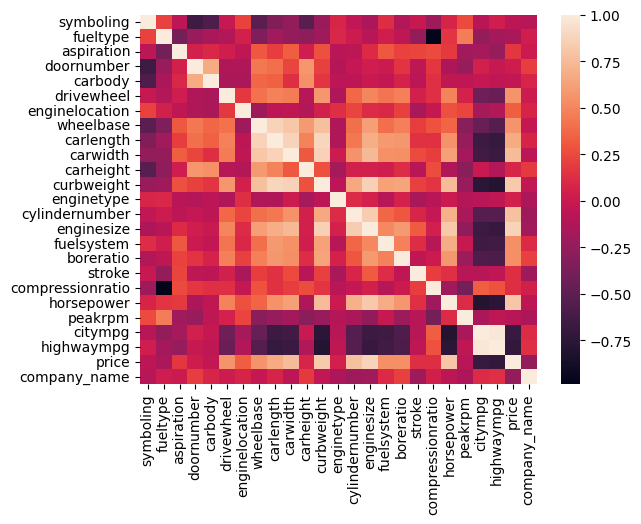

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.dtypes

symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
company_name          int64
dtype: object

In [ ]:
def iterative_Cleaning_continous_value(data, null_place_df,columns_list, number_of_loops):
    
    for i in range(1, number_of_loops +1):
        for column_name in columns_list:
            data_without_null_values = data[null_place_df[column_name]== False]
            data_with_null_values = data[null_place_df[column_name] == True]
        
            x_train = data_without_null_values.drop(columns = [column_name])
            y_train = data_without_null_values[column_name]
        
            model = LinearRegression()
            model.fit(x_train, y_train)
        
            x_test = data_with_null_values.drop(columns= [column_name])
        
            predicted = model.predict(x_test)
        
            data.loc[data_with_null_values.index , column_name] = predicted
    
    return data 

In [ ]:
data_traditional_cleaning = data_with_null_values

In [ ]:
data_traditional_cleaning['symboling'].fillna(data_traditional_cleaning['symboling'].mode()[0], inplace=True)
data_traditional_cleaning['fueltype'].fillna(data_traditional_cleaning['fueltype'].mode()[0], inplace=True)
data_traditional_cleaning['aspiration'].fillna(data_traditional_cleaning['aspiration'].mode()[0], inplace=True)
data_traditional_cleaning['doornumber'].fillna(data_traditional_cleaning['doornumber'].mode()[0], inplace=True)
data_traditional_cleaning['carbody'].fillna(data_traditional_cleaning['carbody'].mode()[0], inplace=True)
data_traditional_cleaning['drivewheel'].fillna(data_traditional_cleaning['drivewheel'].mode()[0], inplace=True)
data_traditional_cleaning['enginelocation'].fillna(data_traditional_cleaning['enginelocation'].mode()[0], inplace=True)
data_traditional_cleaning['enginetype'].fillna(data_traditional_cleaning['enginetype'].mode()[0], inplace=True)
data_traditional_cleaning['cylindernumber'].fillna(data_traditional_cleaning['cylindernumber'].mode()[0], inplace=True)
data_traditional_cleaning['fuelsystem'].fillna(data_traditional_cleaning['fuelsystem'].mode()[0], inplace=True)
data_traditional_cleaning['company_name'].fillna(data_traditional_cleaning['company_name'].mode()[0], inplace=True)

# Numerical columns: Choose between mean or median based on assumptions
data_traditional_cleaning['wheelbase'].fillna(data_traditional_cleaning['wheelbase'].mean(), inplace=True)  # Normally distributed
data_traditional_cleaning['carlength'].fillna(data_traditional_cleaning['carlength'].median(), inplace=True)  # Skewed
data_traditional_cleaning['carwidth'].fillna(data_traditional_cleaning['carwidth'].mean(), inplace=True)  # Normally distributed
data_traditional_cleaning['carheight'].fillna(data_traditional_cleaning['carheight'].median(), inplace=True)  # Skewed
data_traditional_cleaning['curbweight'].fillna(data_traditional_cleaning['curbweight'].mean(), inplace=True)  # Normally distributed
data_traditional_cleaning['enginesize'].fillna(data_traditional_cleaning['enginesize'].median(), inplace=True)  # Skewed
data_traditional_cleaning['boreratio'].fillna(data_traditional_cleaning['boreratio'].mean(), inplace=True)  # Normally distributed
data_traditional_cleaning['stroke'].fillna(data_traditional_cleaning['stroke'].median(), inplace=True)  # Skewed
data_traditional_cleaning['compressionratio'].fillna(data_traditional_cleaning['compressionratio'].mean(), inplace=True)  # Normally distributed
data_traditional_cleaning['horsepower'].fillna(data_traditional_cleaning['horsepower'].median(), inplace=True)  # Skewed
data_traditional_cleaning['peakrpm'].fillna(data_traditional_cleaning['peakrpm'].median(), inplace=True)  # Skewed
data_traditional_cleaning['citympg'].fillna(data_traditional_cleaning['citympg'].mean(), inplace=True)  # Normally distributed
data_traditional_cleaning['highwaympg'].fillna(data_traditional_cleaning['highwaympg'].mean(), inplace=True)  # Normally distributed
data_traditional_cleaning['price'].fillna(data_traditional_cleaning['price'].median(), inplace=True)  # Skewed


C:\Users\harme\AppData\Local\Temp\ipykernel_19776\2578353033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_traditional_cleaning['symboling'].fillna(data_traditional_cleaning['symboling'].mode()[0], inplace=True)
C:\Users\harme\AppData\Local\Temp\ipykernel_19776\2578353033.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

In [ ]:
data_traditional_cleaning

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,1.0,0.0,2.0,3.0,2.0,0.0,88.6,173.2,64.1,...,5.0,3.470000,2.68,9.000000,111.0,5000.0,21.000000,27.000000,13495.0,0.0
1,3,1.0,0.0,2.0,0.0,2.0,0.0,88.6,168.8,64.1,...,5.0,3.470000,2.68,9.000000,111.0,5000.0,21.000000,27.000000,16500.0,0.0
2,1,1.0,0.0,2.0,2.0,2.0,0.0,94.5,171.2,65.5,...,5.0,2.680000,3.47,10.123351,154.0,5000.0,19.000000,26.000000,16500.0,0.0
3,2,1.0,0.0,4.0,3.0,1.0,0.0,99.8,176.6,66.2,...,5.0,3.190000,3.40,10.000000,102.0,5500.0,25.232432,30.000000,13950.0,1.0
4,2,1.0,0.0,4.0,3.0,0.0,0.0,99.4,173.2,66.4,...,5.0,3.190000,3.40,8.000000,115.0,5500.0,18.000000,22.000000,17450.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1.0,0.0,4.0,3.0,2.0,0.0,109.1,188.8,68.9,...,5.0,3.780000,3.15,9.500000,114.0,5400.0,23.000000,28.000000,10345.0,21.0
201,-1,1.0,1.0,4.0,3.0,2.0,0.0,109.1,188.8,68.8,...,5.0,3.780000,3.15,8.700000,95.0,5300.0,25.232432,30.702703,19045.0,21.0
202,-1,1.0,0.0,4.0,3.0,2.0,0.0,109.1,173.2,68.9,...,5.0,3.580000,2.87,8.800000,134.0,5500.0,18.000000,23.000000,10345.0,21.0
203,-1,0.0,0.0,4.0,3.0,1.0,0.0,109.1,188.8,68.9,...,3.0,3.010000,3.40,23.000000,106.0,4800.0,26.000000,27.000000,22470.0,21.0


In [ ]:
data_traditional_with_iterative = iterative_Cleaning_discrete_values(data_traditional_cleaning, data_null_places, column_list,1)

In [ ]:
data_traditional_with_iterative

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,1.0,0.0,2.0,3.0,2.0,0.0,88.6,173.2,64.1,...,5.0,3.470000,2.68,9.000000,111.0,5000.0,21.000000,27.000000,13495.0,0.0
1,3,1.0,0.0,2.0,0.0,2.0,0.0,88.6,168.8,64.1,...,5.0,3.470000,2.68,9.000000,111.0,5000.0,21.000000,27.000000,16500.0,0.0
2,1,1.0,0.0,2.0,2.0,2.0,0.0,94.5,171.2,65.5,...,5.0,2.680000,3.47,10.123351,154.0,5000.0,19.000000,26.000000,16500.0,0.0
3,2,1.0,0.0,4.0,3.0,1.0,0.0,99.8,176.6,66.2,...,5.0,3.190000,3.40,10.000000,102.0,5500.0,25.232432,30.000000,13950.0,1.0
4,2,1.0,0.0,4.0,3.0,0.0,0.0,99.4,173.2,66.4,...,5.0,3.190000,3.40,8.000000,115.0,5500.0,18.000000,22.000000,17450.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1.0,0.0,4.0,3.0,2.0,0.0,109.1,188.8,68.9,...,5.0,3.780000,3.15,9.500000,114.0,5400.0,23.000000,28.000000,10345.0,21.0
201,-1,1.0,1.0,4.0,3.0,2.0,0.0,109.1,188.8,68.8,...,5.0,3.780000,3.15,8.700000,95.0,5300.0,25.232432,30.702703,19045.0,21.0
202,-1,1.0,0.0,4.0,3.0,2.0,0.0,109.1,173.2,68.9,...,5.0,3.580000,2.87,8.800000,134.0,5500.0,18.000000,23.000000,10345.0,21.0
203,-1,0.0,0.0,4.0,3.0,1.0,0.0,109.1,188.8,68.9,...,3.0,3.010000,3.40,23.000000,106.0,4800.0,26.000000,27.000000,22470.0,21.0


In [ ]:
column_list = ['symboling']

In [ ]:
column_list

['symboling']

In [ ]:
iterative_symbolling_data = data_traditional_with_iterative[data_null_places["symboling"] == True][["symboling"]]

In [ ]:
original_data

,symboling
1,3.0
9,1.0
14,-1.0
16,0.0
30,1.0
51,1.0
64,0.0
65,0.0
71,0.0
78,1.0


In [ ]:
iterative_symbolling_data - original_data

,symboling
1,0.0
9,2.0
14,1.0
16,0.0
30,1.0
51,0.0
64,0.0
65,0.0
71,0.0
78,0.0


In [ ]:
data_columns = ["wheelbase"]

In [ ]:
data_columns

['wheelbase']

In [ ]:
data_wheelbase_correction = iterative_Cleaning_continous_value(data_traditional_cleaning,data_null_places, data_columns,1)

In [ ]:
iterative_wheelbase_data = data_wheelbase_correction[data_null_places["wheelbase"] == True][["wheelbase"]]

In [ ]:
original_wheelbase_data = data[data_null_places["wheelbase"] == True][["wheelbase"]]

In [ ]:
iterative_wheelbase_data - original_wheelbase_data

,wheelbase
22,-0.336600
26,0.270192
27,-1.188297
47,-2.177268
56,-2.995124
62,2.614825
87,0.172712
98,0.213705
107,-1.693891
108,0.382832


In [ ]:

data_discrete = ["symboling", "fueltype", "aspiration", "doornumber", "drivewheel", "enginelocation","enginetype","cylindernumber", "fuelsystem","company_name"]



In [ ]:
data_continuos = ["wheelbase","carlength", "carwidth","carheight","curbweight","enginesize","boreratio", "stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]

In [ ]:
data["price"].unique()

array([13495.   , 16500.   , 13950.   , 17450.   , 15250.   , 17710.   ,
       18920.   , 23875.   , 17859.167, 16430.   , 16925.   , 20970.   ,
       21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,  5151.   ,
        6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,  6229.   ,
        6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,  6479.   ,
        6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,  7895.   ,
        9095.   ,  8845.   , 10295.   , 12945.   , 10345.   ,  6785.   ,
        8916.5  , 11048.   , 32250.   , 35550.   , 36000.   ,  5195.   ,
        6095.   ,  6795.   ,  6695.   ,  7395.   , 10945.   , 11845.   ,
       13645.   , 15645.   ,  8495.   , 10595.   , 10245.   , 10795.   ,
       11245.   , 18280.   , 18344.   , 25552.   , 28248.   , 28176.   ,
       31600.   , 34184.   , 35056.   , 40960.   , 45400.   , 16503.   ,
        5389.   ,  6189.   ,  6669.   ,  7689.   ,  9959.   ,  8499.   ,
       12629.   , 14869.   , 14489.   ,  6989.   , 

In [ ]:
data.dtypes

symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
company_name          int64
dtype: object

In [14]:
def overalliterative(data_columns_discrete, data_columns_continuos,number_of_loops, data, null_place_df):
    for i in range(1, number_of_loops +1):
        for column_name in data_columns_continuos:
            data_without_null_values = data[null_place_df[column_name]== False]
            data_with_null_values = data[null_place_df[column_name] == True]
        
            x_train = data_without_null_values.drop(columns = [column_name])
            y_train = data_without_null_values[column_name]
        
            model = LinearRegression()
            model.fit(x_train, y_train)
        
            x_test = data_with_null_values.drop(columns= [column_name])
        
            predicted = model.predict(x_test)
        
            data.loc[data_with_null_values.index , column_name] = predicted
            
        for column_name in data_columns_discrete:
            data_without_null_values = data[null_place_df[column_name]== False]
            data_with_null_values = data[null_place_df[column_name] == True]
        
            x_train = data_without_null_values.drop(columns = [column_name])
            y_train = data_without_null_values[column_name]
        
            model = RandomForestClassifier()
            model.fit(x_train, y_train)
        
            x_test = data_with_null_values.drop(columns= [column_name])
        
            predicted = model.predict(x_test)
        
            data.loc[data_with_null_values.index , column_name] = predicted
            
    return data
        

In [ ]:
data_first_run =overalliterative(data_discrete, data_columns, 10,data_traditional_cleaning,data_null_places)

In [ ]:
data_first_run.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,3,1.0,0.0,2.0,3.0,2.0,0.0,88.6,173.2,64.1,...,5.0,3.47,2.68,9.000000,111.0,5000.0,21.000000,27.0,13495.0,0.0
1,3,1.0,0.0,2.0,0.0,2.0,0.0,88.6,168.8,64.1,...,5.0,3.47,2.68,9.000000,111.0,5000.0,21.000000,27.0,16500.0,0.0
2,1,1.0,0.0,2.0,2.0,2.0,0.0,94.5,171.2,65.5,...,5.0,2.68,3.47,10.123351,154.0,5000.0,19.000000,26.0,16500.0,0.0
3,2,1.0,0.0,4.0,3.0,1.0,0.0,99.8,176.6,66.2,...,5.0,3.19,3.40,10.000000,102.0,5500.0,25.232432,30.0,13950.0,1.0
4,2,1.0,0.0,4.0,3.0,0.0,0.0,99.4,173.2,66.4,...,5.0,3.19,3.40,8.000000,115.0,5500.0,18.000000,22.0,17450.0,1.0


In [ ]:
def comparsion(data_iterative, data_original, data_null, data_columns):
    dict = {}
    for column_name in data_columns:
        dif_count = (data_original[data_null[column_name]] == data_iterative[data_null[column_name]]).sum() 
        dict[column_name] = dif_count    
        